# Prediction of POFA Concrete Compressive Strength

### Importing the necessary libraries

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

### Load the dataset

In [2]:
dataset = r"C:\Users\Dell\Documents\ML PCC data.xlsx"
pf = pd.read_excel(dataset, sheet_name= "POFA")
pf.head(10)

,W/B ratio,%Addition,Cement,POFA,Density of Concrete,Fine Agg.,Coarse Agg.,Water,SiO2,Al2O3,Fe2O3,CaO,LOI,Curing Age,Compressive Strength,SuperPlasticiser,References,Link,MIX RATIO
0,0.28,20.0,400.0,100.0,NaN,711.0,1067.0,145.0,58.3,6.69,9.77,6.72,7.34,7,39.31,11.5,CAPOFA,https://www.researchgate.net/publication/25816...,NaN
1,0.28,20.0,400.0,100.0,NaN,711.0,1067.0,145.0,58.3,6.69,9.77,6.72,7.34,28,48.72,11.5,CAPOFA,https://www.researchgate.net/publication/25816...,NaN
2,0.28,20.0,400.0,100.0,NaN,711.0,1067.0,145.0,58.3,6.69,9.77,6.72,7.34,90,53.02,11.5,CAPOFA,https://www.researchgate.net/publication/25816...,NaN
3,0.28,20.0,400.0,100.0,NaN,711.0,1067.0,145.0,59.6,7.05,8.77,8.06,14.85,7,39.61,11.5,KTPOFA,https://www.researchgate.net/publication/25816...,NaN
4,0.28,20.0,400.0,100.0,NaN,711.0,1067.0,145.0,59.6,7.05,8.77,8.06,14.85,28,41.58,11.5,KTPOFA,https://www.researchgate.net/publication/25816...,NaN
5,0.28,20.0,400.0,100.0,NaN,711.0,1067.0,145.0,59.6,7.05,8.77,8.06,14.85,90,53.44,11.5,KTPOFA,https://www.researchgate.net/publication/25816...,NaN
6,0.28,20.0,400.0,100.0,NaN,711.0,1067.0,145.0,52.5,8.83,5.73,11.30,6.72,7,28.79,11.5,ALPOFA,https://www.researchgate.net/publication/25816...,NaN
7,0.28,20.0,400.0,100.0,NaN,711.0,1067.0,145.0,52.5,8.83,5.73,11.30,6.72,28,36.87,11.5,ALPOFA,https://www.researchgate.net/publication/25816...,NaN
8,0.28,20.0,400.0,100.0,NaN,711.0,1067.0,145.0,52.5,8.83,5.73,11.30,6.72,90,51.95,11.5,ALPOFA,https://www.researchgate.net/publication/25816...,NaN
9,0.28,0.0,500.0,0.0,NaN,711.0,1067.0,145.0,21.9,5.00,2.60,65.10,1.30,7,43.11,11.5,Control,https://www.researchgate.net/publication/25816...,NaN


### Initial Data Exploration and Data Cleaning

In [4]:
rows, cols = pf.shape
print("This data has {} rows and {} columns".format(rows, cols))


This data has 924 rows and 19 columns


In [5]:
pf.columns

Index(['W/B ratio', '%Addition', 'Cement', 'POFA', 'Density of Concrete',
       'Fine Agg.', 'Coarse Agg.', 'Water', 'SiO2', 'Al2O3', 'Fe2O3', 'CaO',
       'LOI', 'Curing Age', 'Compressive Strength', 'SuperPlasticiser',
       'References', 'Link', 'MIX RATIO'],
      dtype='object')

#### Let's rename the columns

In [10]:
pf = pf.rename(columns={'W/B ratio':'w/b_ratio', '%Addition':'perc_add', 'Cement':'cement', 'POFA':'pofa', 'Density of Concrete':'concrete_density',
       'Fine Agg.':'fine_agg', 'Coarse Agg.':'coarse_agg', 'Water':'water', 'LOI':'loi', 'Curing Age':'age', 'Compressive Strength':'compr_strength', 'SuperPlasticiser':'superplasticiser',
      })
pf.columns

Index(['w/b_ratio', 'perc_add', 'cement', 'pofa', 'concrete_density',
       'fine_agg', 'coarse_agg', 'water', 'SiO2', 'Al2O3', 'Fe2O3', 'CaO',
       'loi', 'age', 'compr_strength', 'superplasticiser', 'References',
       'Link', 'MIX RATIO'],
      dtype='object')

#### Let's drop irrelevant columns

In [24]:
pf = pf.drop(["concrete_density"], axis=1)

In [25]:
for col in pf.columns:
    pct_na = (pf[col].isna().sum() / pf[col].value_counts().sum()) * 100
    print('{} has {:.2f}% NA values'.format(col, pct_na))

w/b_ratio has 5.15% NA values
perc_add has 0.66% NA values
cement has 12.92% NA values
pofa has 12.92% NA values
fine_agg has 16.06% NA values
coarse_agg has 9.03% NA values
water has 21.27% NA values
SiO2 has 11.14% NA values
Al2O3 has 11.14% NA values
Fe2O3 has 11.14% NA values
CaO has 11.14% NA values
loi has 31.90% NA values
age has 0.00% NA values
compr_strength has 0.00% NA values
superplasticiser has 11.41% NA values


#### Let's remove rows with no value for compressive strength

In [21]:
pf.dropna(subset=['compr_strength'], inplace=True)
pf.shape

(918, 16)

In [26]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   w/b_ratio         873 non-null    float64
 1   perc_add          912 non-null    float64
 2   cement            813 non-null    float64
 3   pofa              813 non-null    float64
 4   fine_agg          791 non-null    float64
 5   coarse_agg        842 non-null    float64
 6   water             757 non-null    float64
 7   SiO2              826 non-null    float64
 8   Al2O3             826 non-null    float64
 9   Fe2O3             826 non-null    float64
 10  CaO               826 non-null    float64
 11  loi               696 non-null    float64
 12  age               918 non-null    int64  
 13  compr_strength    918 non-null    float64
 14  superplasticiser  824 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 114.8 KB


### Exploratory Data Analysis

In [29]:
#check the number of duplicates
sum(pf.duplicated())

1

In [31]:
#remove duplicates
pf= pf.drop_duplicates()

In [32]:
pf.describe()

,w/b_ratio,perc_add,cement,pofa,fine_agg,coarse_agg,water,SiO2,Al2O3,Fe2O3,CaO,loi,age,compr_strength,superplasticiser
count,872.000000,911.000000,812.000000,812.000000,790.000000,841.000000,756.000000,825.000000,825.000000,825.000000,825.000000,695.000000,917.000000,917.000000,823.000000
mean,0.434039,25.071029,332.881532,129.699825,867.247127,755.374376,184.441495,55.811370,4.573642,5.198073,10.833621,7.605165,39.689204,44.282441,4.990590
std,0.150514,20.126191,135.765162,116.630387,241.957753,401.884927,35.456930,14.958312,2.715003,2.750618,14.696976,6.623811,61.710626,27.846211,7.552547
min,0.160000,0.000000,0.000000,0.000000,146.000000,0.000000,90.000000,15.700000,0.900000,1.350000,0.179000,0.480000,0.000000,1.348315,0.000000
25%,0.350000,10.000000,245.000000,48.000000,742.000000,709.000000,168.000000,47.440000,3.150000,3.400000,5.010000,1.800000,7.000000,24.072949,0.000000
50%,0.400000,20.000000,330.000000,96.000000,798.000000,840.000000,176.000000,59.170000,3.900000,4.410000,6.400000,5.600000,28.000000,38.260870,3.390000
75%,0.500000,30.000000,411.800000,166.000000,925.000000,1026.000000,205.000000,65.300000,5.510000,6.250000,10.800000,10.010000,56.000000,61.800000,6.400000
max,1.190758,100.000000,936.000000,525.000000,1578.000000,1428.570000,306.000000,79.230000,11.400000,13.570000,70.370000,20.900000,545.000000,155.740741,55.000000


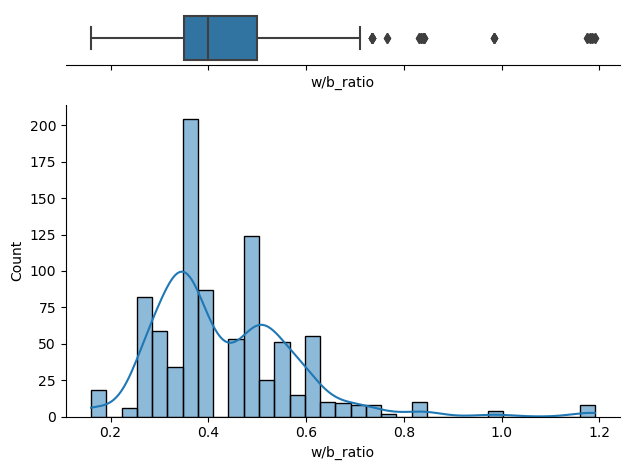

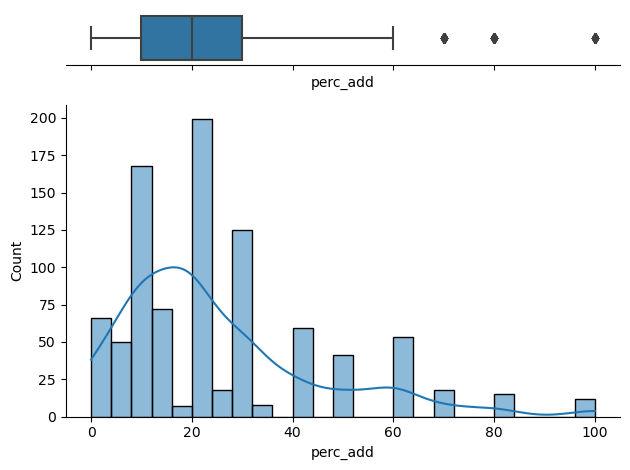

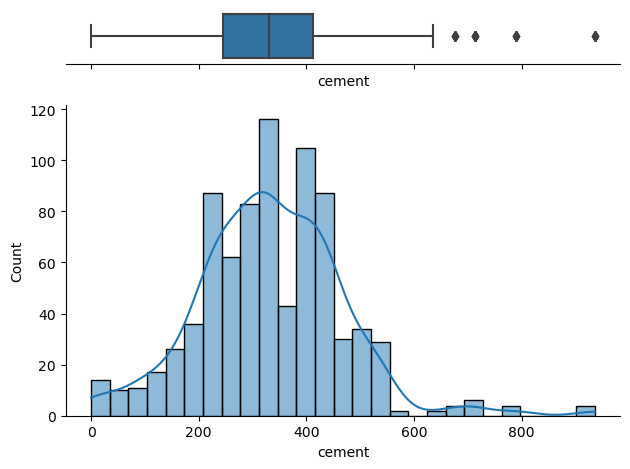

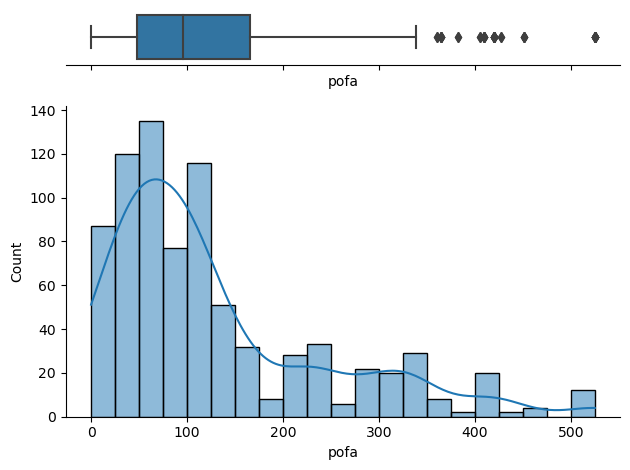

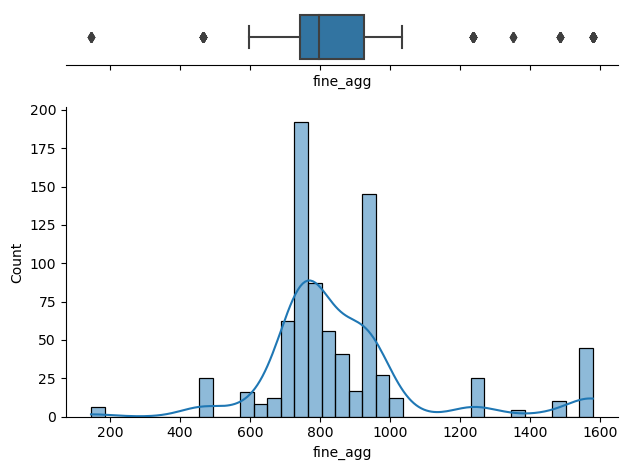

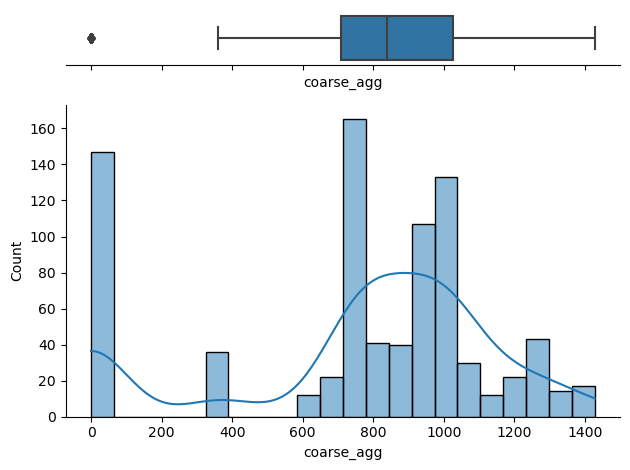

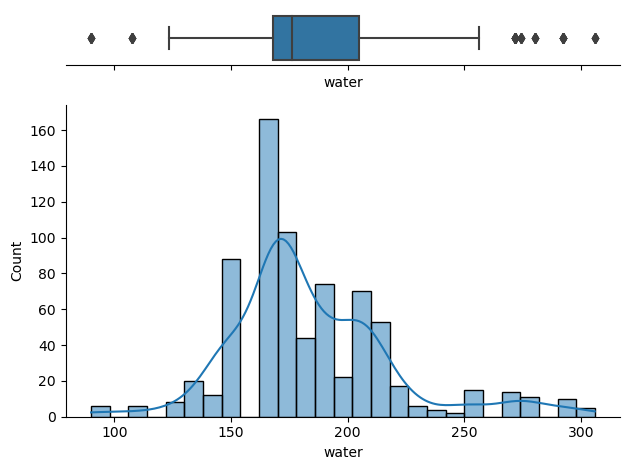

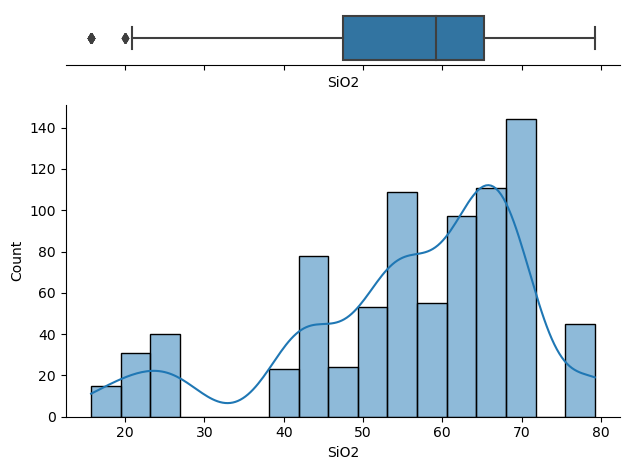

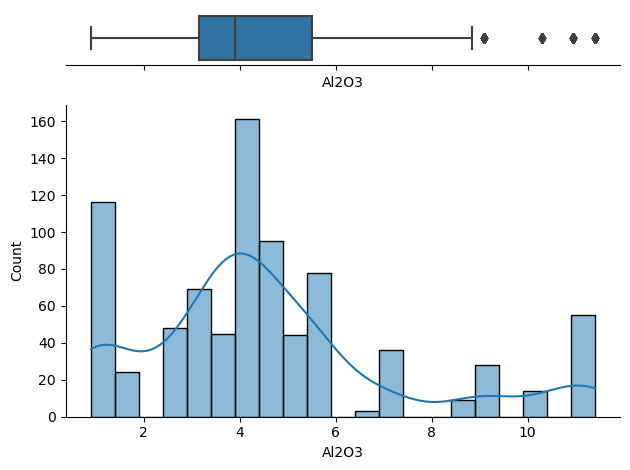

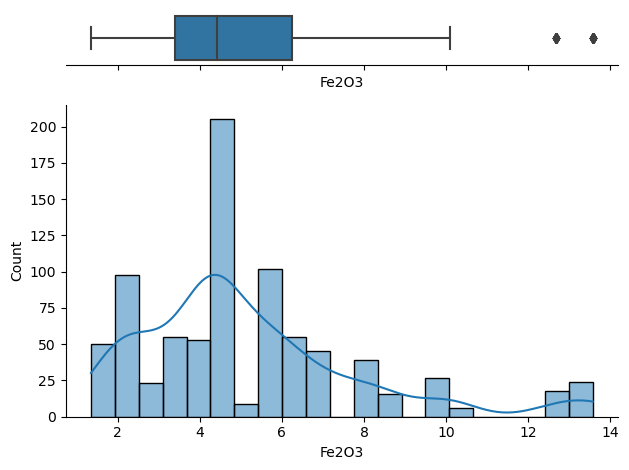

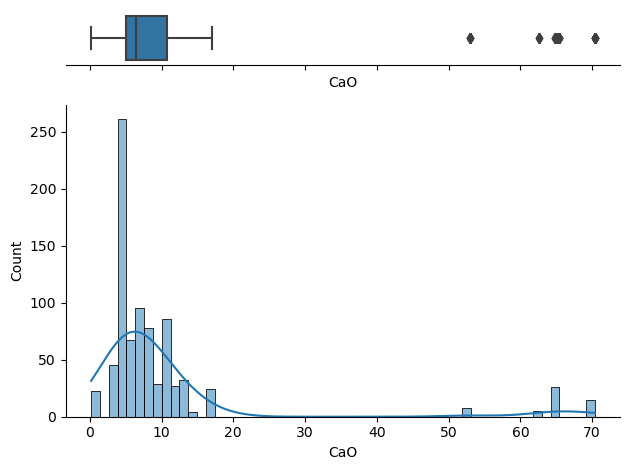

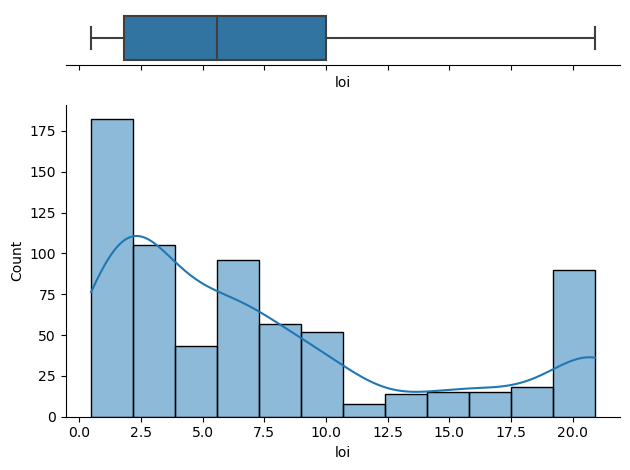

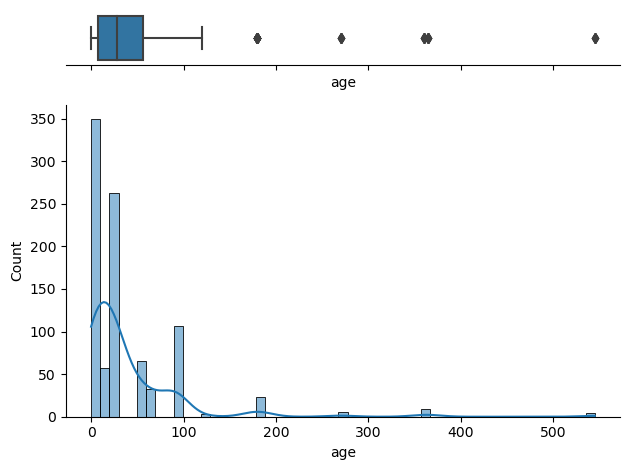

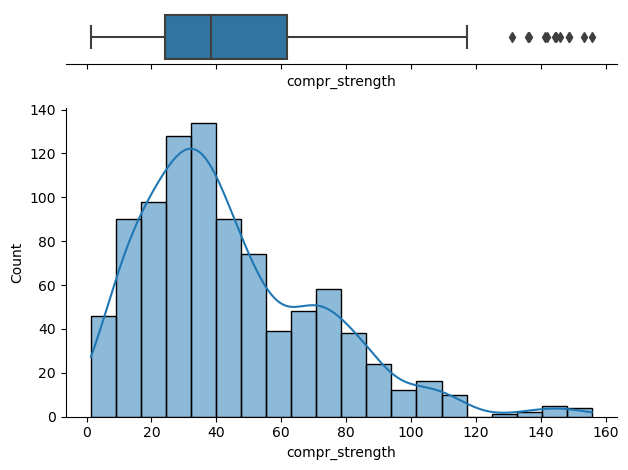

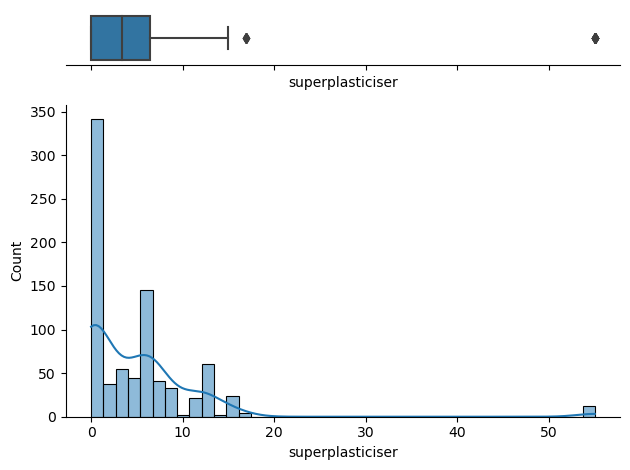

In [44]:
for label in pf:
    # Create subplots with 2 rows (for boxplot and histogram), sharing the x-axis
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    # Create a histogram using Seaborn and place it in the 'ax_hist' subplot and boxplot in 'ax_box'
    sns.histplot(data=pf, x=label, kde=True, ax=ax_hist)
    sns.boxplot(data=pf, x=label, ax=ax_box)
    
    # Ensure subplots don't overlap
    plt.tight_layout()
    
    ax_box.set(yticks=[]) # Remove y-axis ticks from the boxplot subplot
    
    sns.despine(ax=ax_hist)  # Remove top spine from the histogram subplot
    
    sns.despine(ax=ax_box, left=True)  # Remove left spine from the boxplot subplot
    
    plt.show()


### Checking Relationships

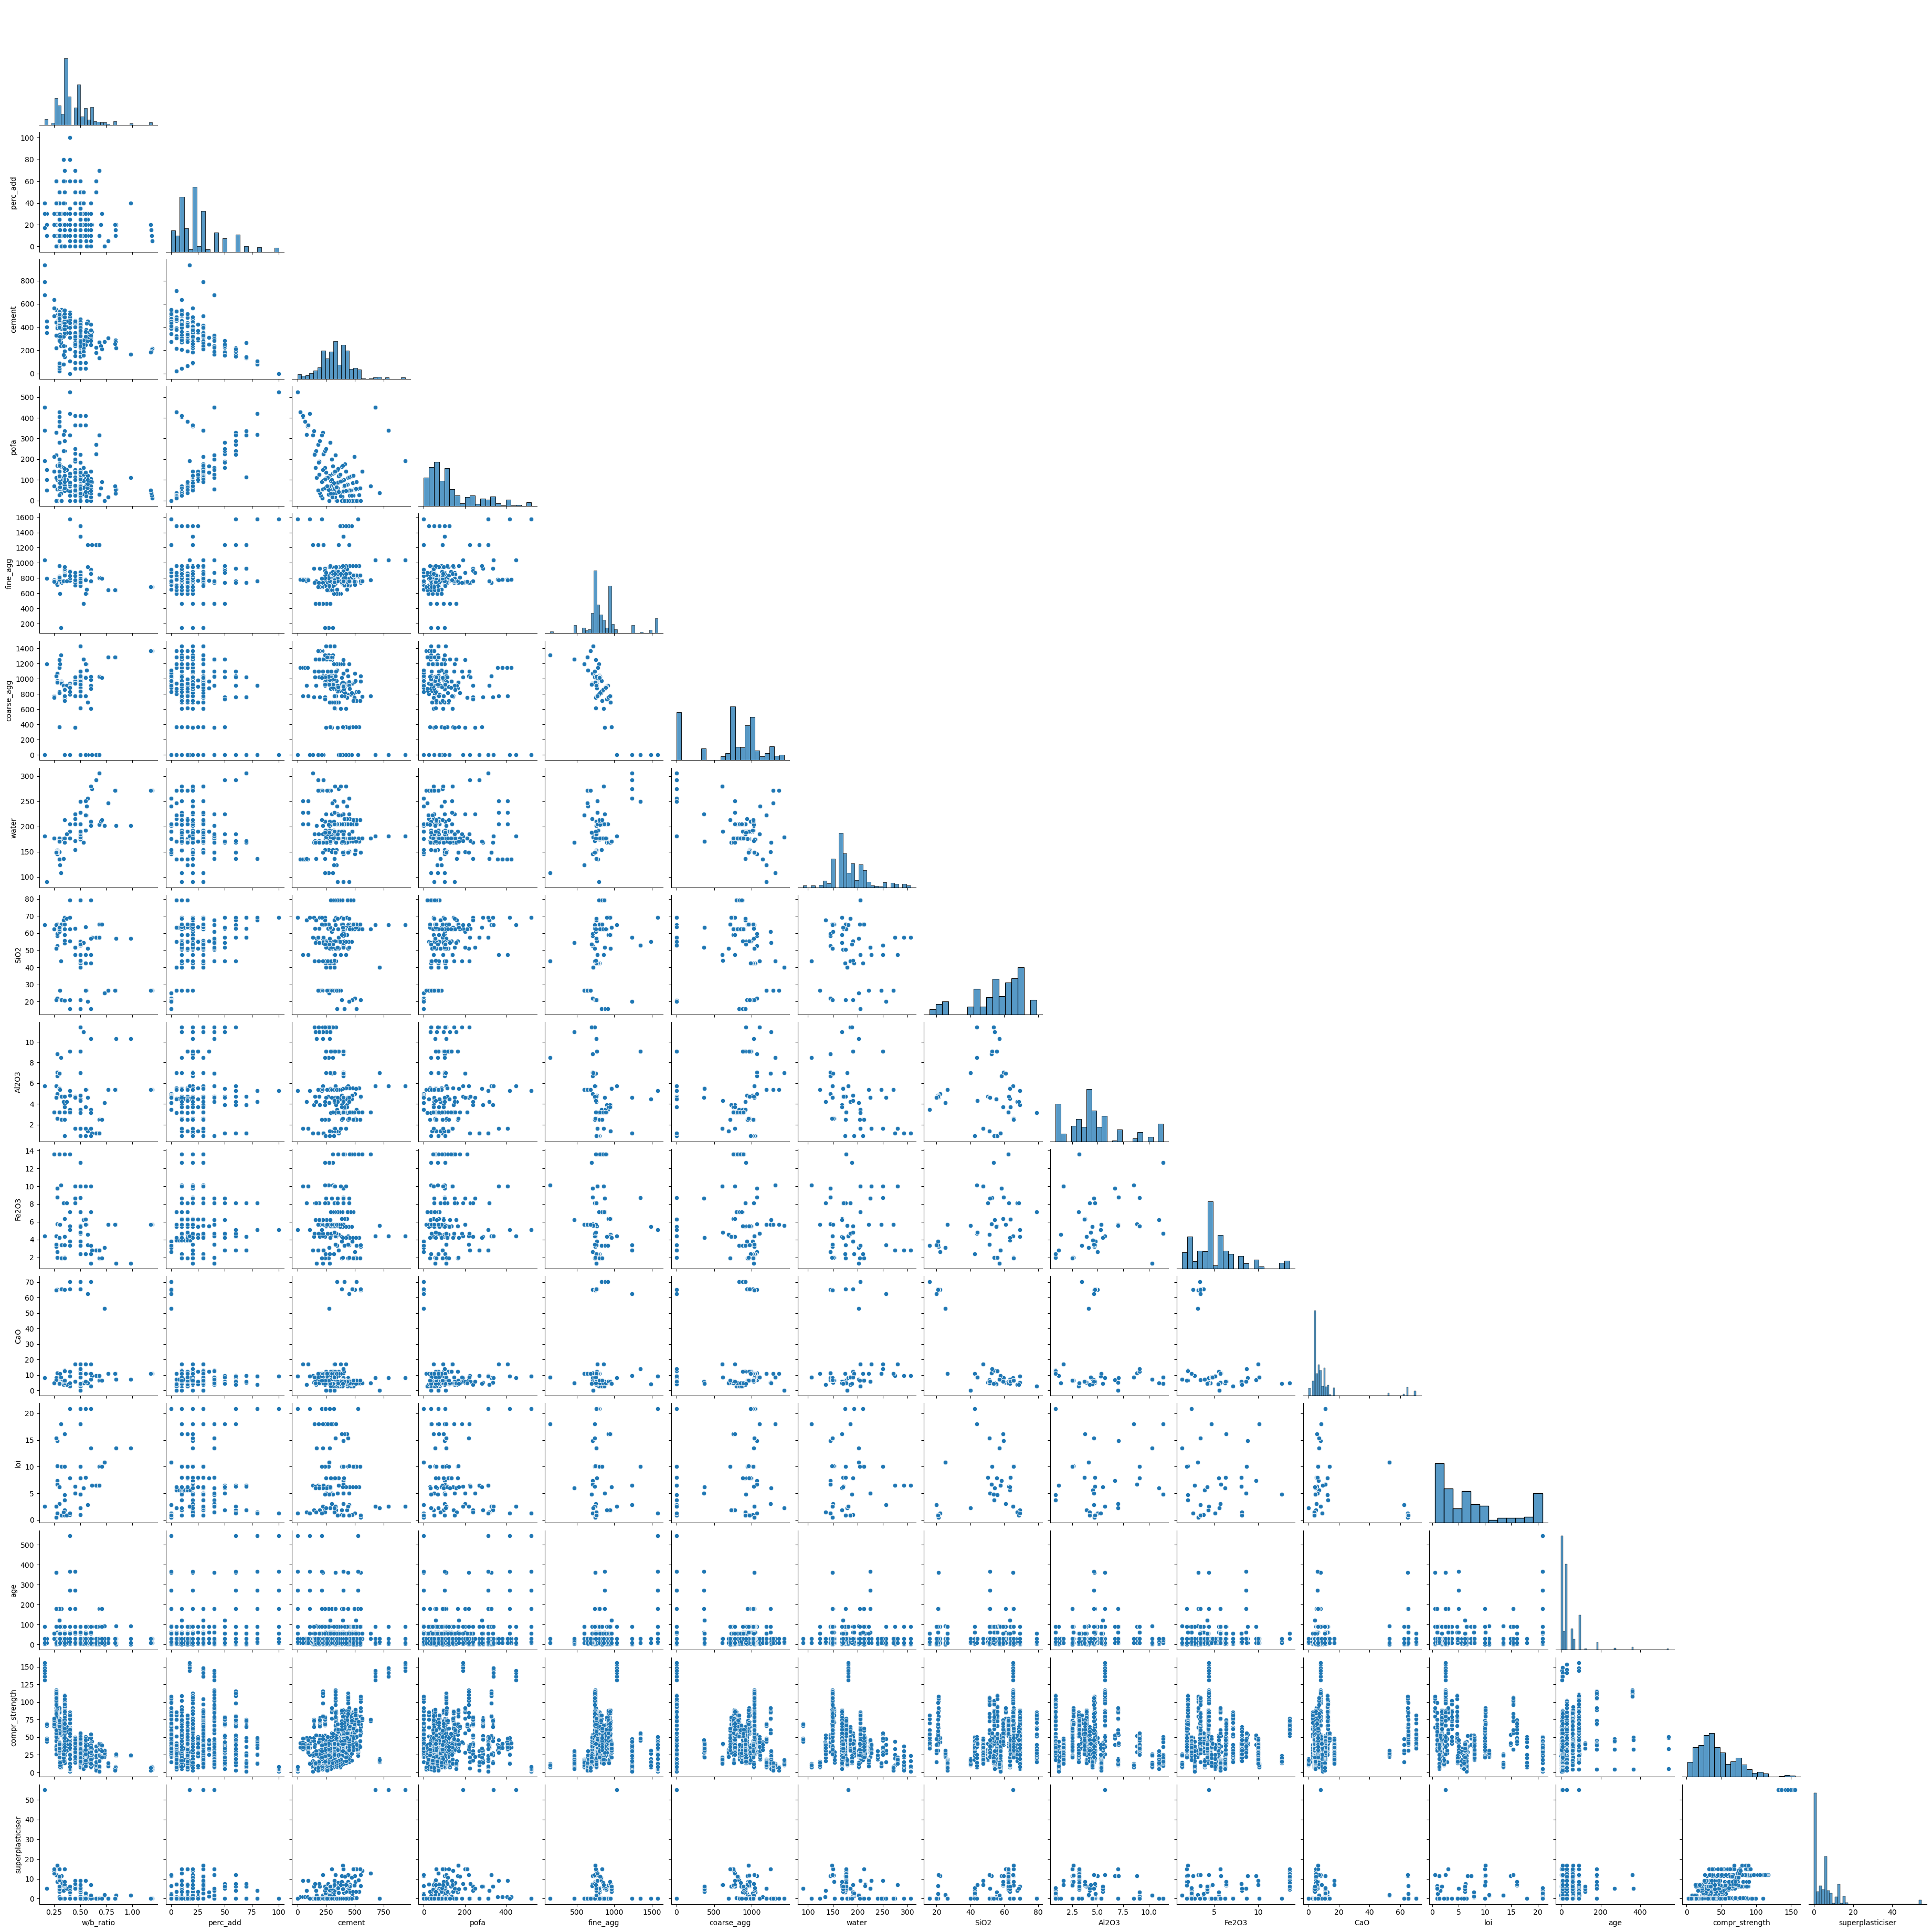

In [73]:
sns.pairplot(data=pf, corner=True)
plt.show()

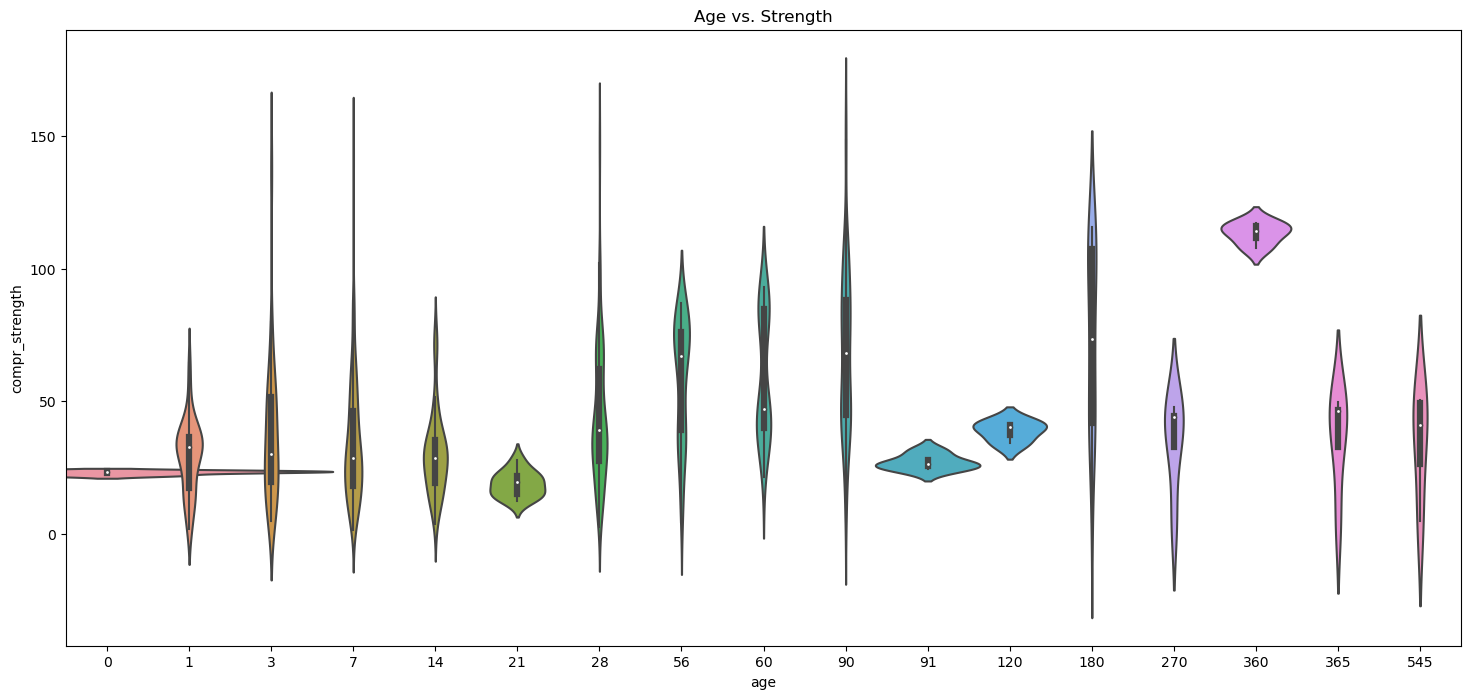

In [55]:
plt.figure(figsize=(18, 8), label='Age vs. Strength')
plt.title('Age vs. Strength')
sns.violinplot(data=pf, x="age", y="compr_strength", width=5.5)
plt.show()

In [57]:
pf.corr()

,w/b_ratio,perc_add,cement,pofa,fine_agg,coarse_agg,water,SiO2,Al2O3,Fe2O3,CaO,loi,age,compr_strength,superplasticiser
w/b_ratio,1.000000,-0.146700,-0.371541,-0.289838,-0.054378,0.121837,0.711995,-0.361389,0.029293,-0.044938,0.080004,0.358094,-0.110400,-0.597722,-0.510598
perc_add,-0.146700,1.000000,-0.618441,0.848361,0.388182,-0.260295,-0.113894,0.371031,0.053306,-0.048466,-0.344436,0.015736,0.165467,-0.018849,0.124434
cement,-0.371541,-0.618441,1.000000,-0.544858,-0.079573,-0.089094,-0.090686,-0.006002,-0.051081,-0.027500,0.155431,-0.189199,-0.030368,0.463140,0.502284
pofa,-0.289838,0.848361,-0.544858,1.000000,0.405706,-0.390107,-0.128826,0.369811,-0.058821,0.029595,-0.273631,-0.053658,0.157658,0.125473,0.358281
fine_agg,-0.054378,0.388182,-0.079573,0.405706,1.000000,-0.880251,0.339968,0.258507,-0.349024,-0.182873,0.004469,0.182024,0.253505,-0.013589,0.063762
coarse_agg,0.121837,-0.260295,-0.089094,-0.390107,-0.880251,1.000000,-0.384730,-0.211823,0.345868,0.142708,-0.039967,-0.028867,-0.168712,-0.122096,-0.171120
water,0.711995,-0.113894,-0.090686,-0.128826,0.339968,-0.384730,1.000000,-0.231805,-0.255626,-0.013258,0.145276,0.177993,-0.083962,-0.365626,-0.225597
SiO2,-0.361389,0.371031,-0.006002,0.369811,0.258507,-0.211823,-0.231805,1.000000,-0.075250,0.112467,-0.702709,-0.339600,-0.001664,0.256844,0.211190
Al2O3,0.029293,0.053306,-0.051081,-0.058821,-0.349024,0.345868,-0.255626,-0.075250,1.000000,0.282658,-0.080322,-0.137068,-0.046602,-0.196678,-0.049589
Fe2O3,-0.044938,-0.048466,-0.027500,0.029595,-0.182873,0.142708,-0.013258,0.112467,0.282658,1.000000,-0.208734,-0.214033,-0.087060,-0.160512,-0.015690


<Axes: >

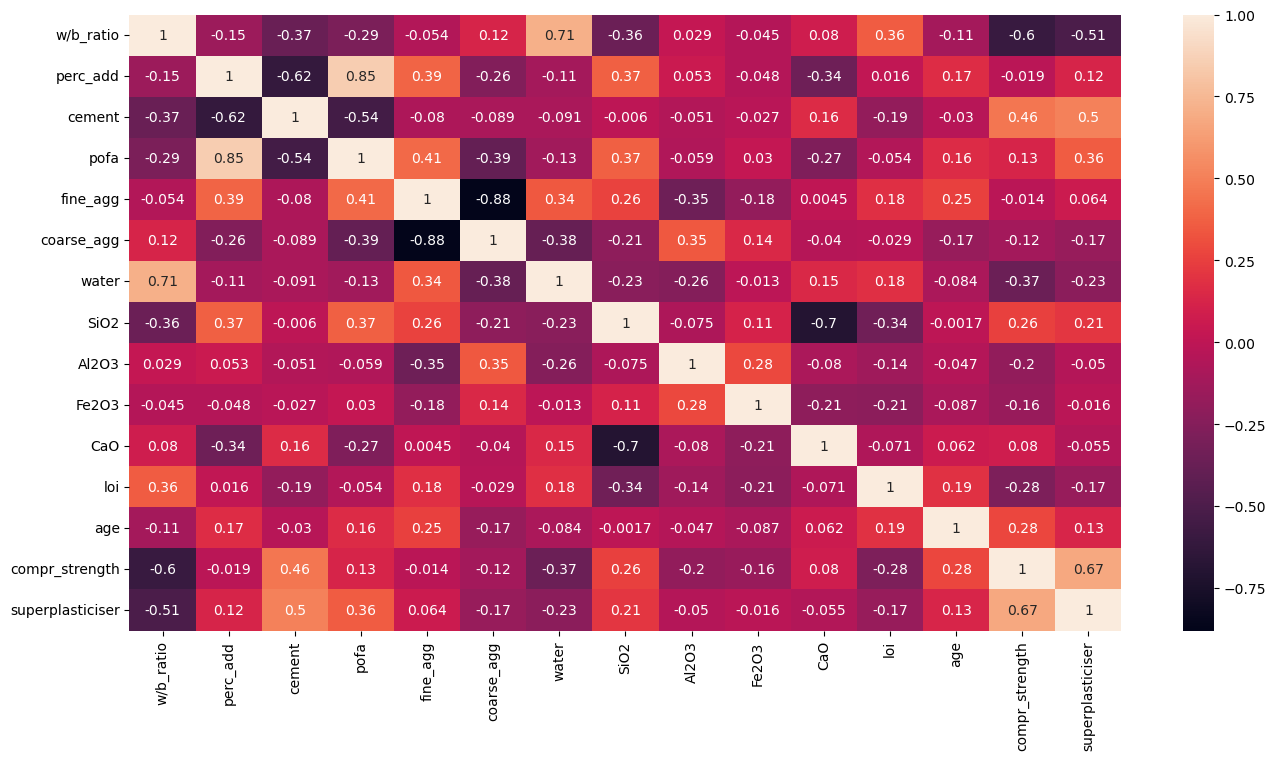

In [64]:
plt.figure(figsize=(16, 8))
sns.heatmap(pf.corr(), annot=True)

In [72]:
correlations = []
for col in pf.columns.drop('compr_strength'):
    val = scipy.stats.pearsonr(pf[col],pf.compr_strength)[0]
    correlations.append({
        'Feature':col,
        'Correlation with Strength':val
    })
    
pd.DataFrame(correlations).sort_values('Correlation with Strength', ascending=False)

ValueError: array must not contain infs or NaNs